In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

In [5]:
titanic = pd.read_csv("titanic-data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
n_titanic_data = titanic.drop(columns=['Cabin','Ticket','Name','Fare','PassengerId'],axis=1)
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [11]:
descript = n_titanic_data.copy()
descript.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [15]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [17]:
temp = pd.DataFrame()
temp['{} No'.format('Embarked')] = titanic.groupby('Embarked').size()


,Embarked No
Embarked,
C,168
Q,77
S,644


In [50]:
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks',color_palette = 'coolwarm'):
    gr = pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    print('Total No. of {} {}'.format(col,gr['{} No'.format(col)].sum()))
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    fig = plt.figure()
    plt.axis('off')
    fig.add_subplot(121)
    
    ax = gr['{} No'.format(col)].plot(kind='bar',title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation = 0)
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()), ha='center', 
                    va='center', xytext=(0,10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind='pie', 
                                          autopct='%1.1f%%',shadow=False,title='{} Ratio'.format(col),
                                          legend=False,labels=None);
    sns.despine(top=True, right=True, left=True, bottom = False);
    

Total No. of Embarked 889


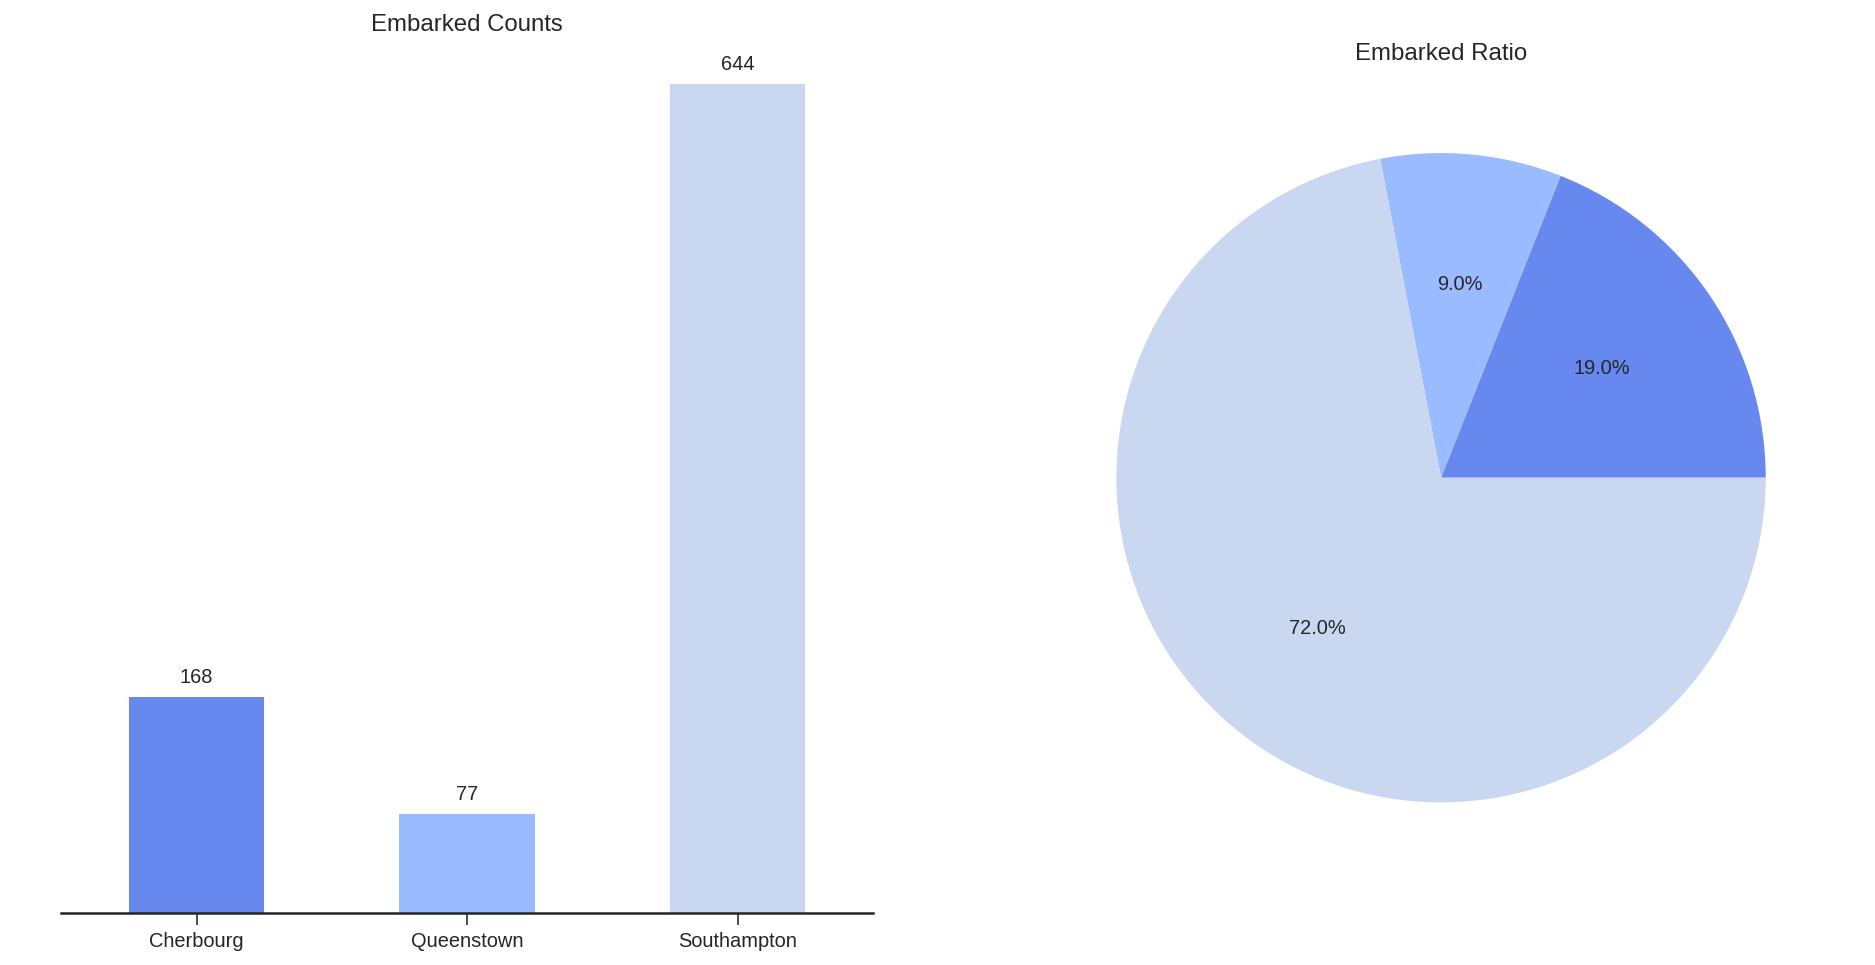

In [51]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

In [1]:
def plot(table, legloc='upper right', plt_style= 'seabotn-ticks', color_palette='dark',sorter=None, stacked=False,
        kind ='bar', percentage=True, custom_title=None, minimal=True,figsize=(19,10),width=0.7):
    grouped = table
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:
        del grouped['Total']
    except:
        pass
    
    if sorter:
        grouped = grouped[sorter]
        
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind, stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    plt.legend(loc = legloc)
    
    if percentage == True:
        for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                       (p.get_x()+p.get_width()/2. , p.get_height()), ha='center',
                        va = 'center', xytext=(0,10), textcoords = 'offset points')
    else:
        for p in ax.patches():
            ax.annotate(np.round(p.get_height(), decimals=2), (p.get_x()+p.get_width()/2.,p.get_height()), 
            ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left= True, bottom=False);
    else:
        pass
    
    plt.title(custom_title)

In [57]:
def Groupby_TwoCol_Plot(df, col1, col2, legloc = 'upper right', plt_style = 'ggplot', 
                        color_palette = 'dark', sorter = None, stacked=False, kind='bar',
                       percentage=True, custom_title=None, minimal=True, figsize=(14,6), width=0.6):
    
    grouped = df.groupby([col2, col1]).size().unstack(col2)
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
    plot(grouped, legloc=legloc, plt_style = plt_style, color_palette = color_palette, sorter=sorter,
        stacked = stacked, kind = kind, percentage = percentage, custom_title = custom_title, minimal= minimal, 
         figsize = figsize, width = width)

In [58]:
titanic.groupby(['Sex','Survived']).size().unstack('Survived')

Survived,0,1
Sex,,
female,81,233
male,468,109


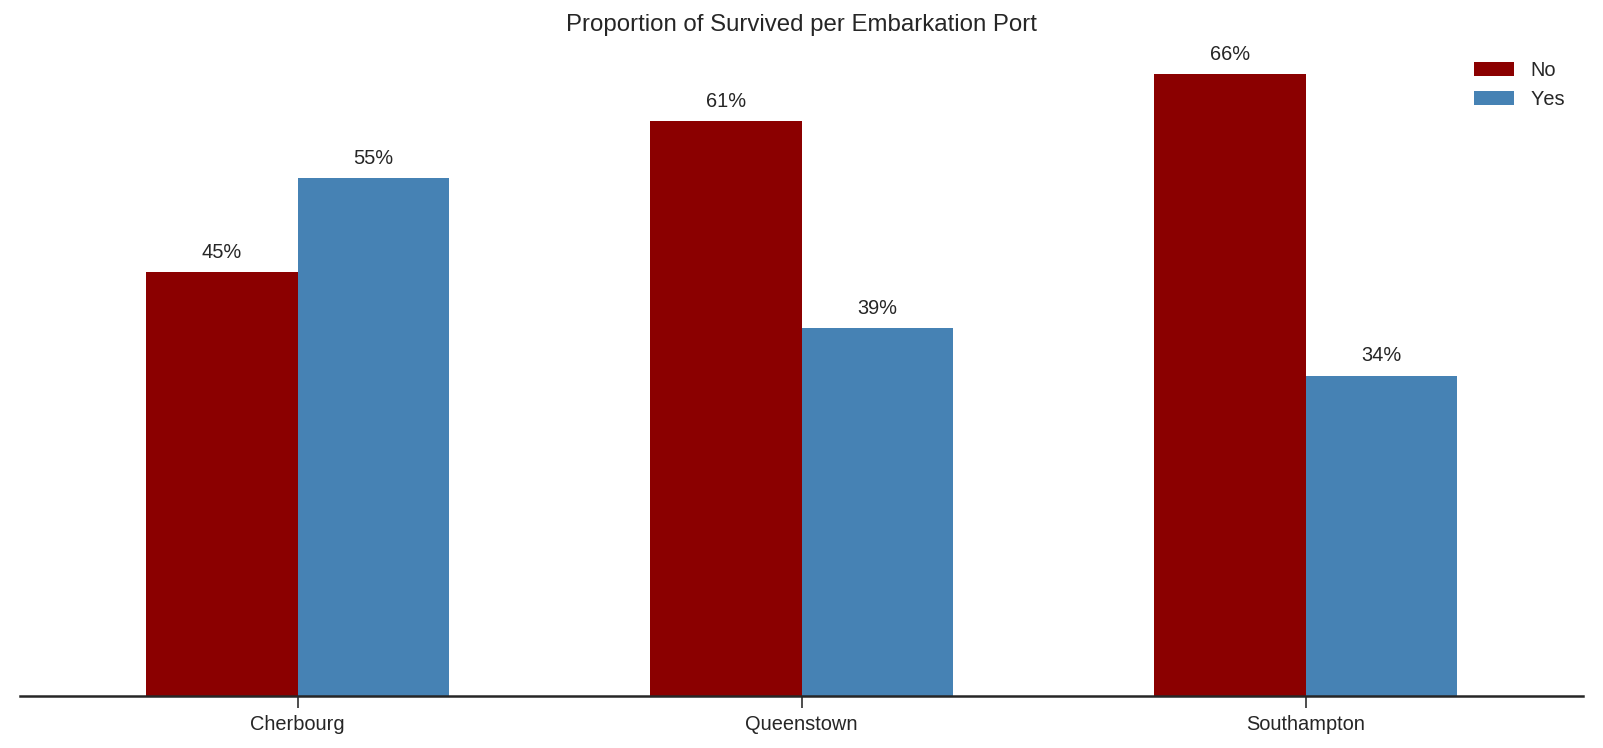

In [59]:
Groupby_TwoCol_Plot(descript, 'Embarked', 'Survived', color_palette=('darkred', 'steelblue'), 
                    plt_style = 'seaborn-ticks', custom_title= 'Proportion of Survived per Embarkation Port')

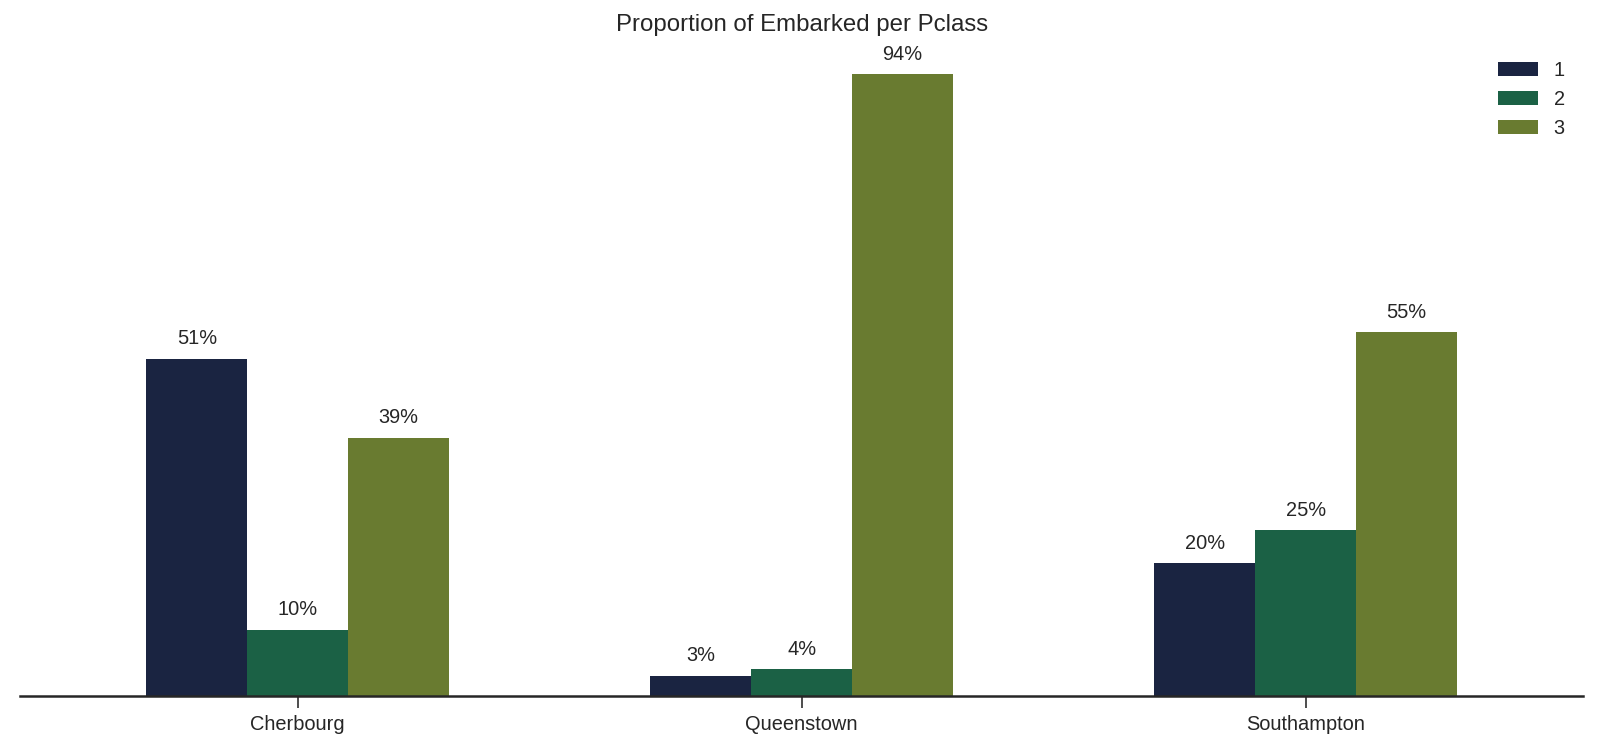

In [80]:
Groupby_TwoCol_Plot(descript, 'Embarked', 'Pclass', color_palette=('cubehelix'), 
                    plt_style = 'seaborn-ticks', custom_title= 'Proportion of Embarked per Pclass', sorter=[1,2,3])

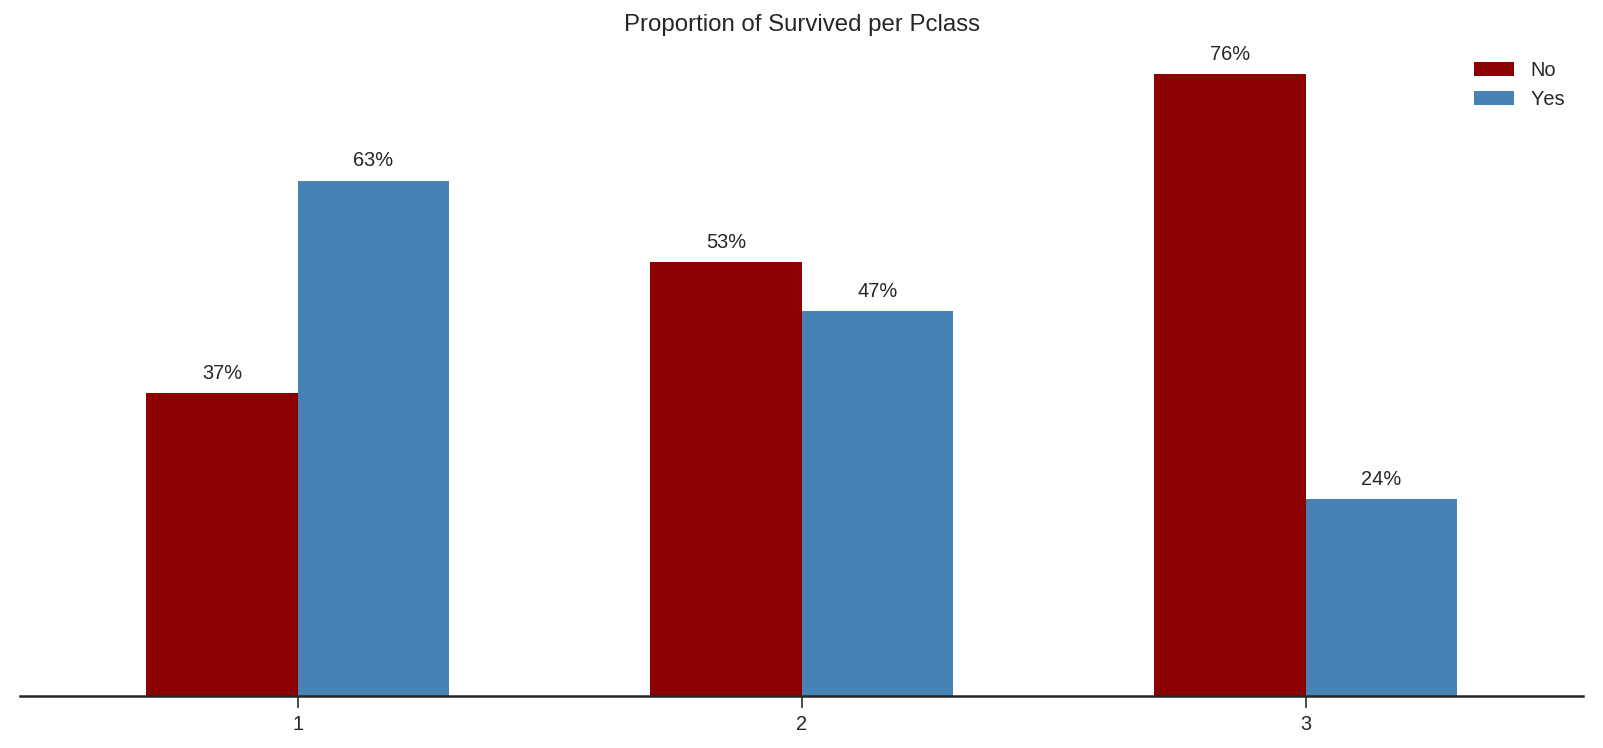

In [81]:
Groupby_TwoCol_Plot(descript, 'Pclass', 'Survived', color_palette=('darkred', 'steelblue'), 
                    plt_style = 'seaborn-ticks', custom_title= 'Proportion of Survived per Pclass')

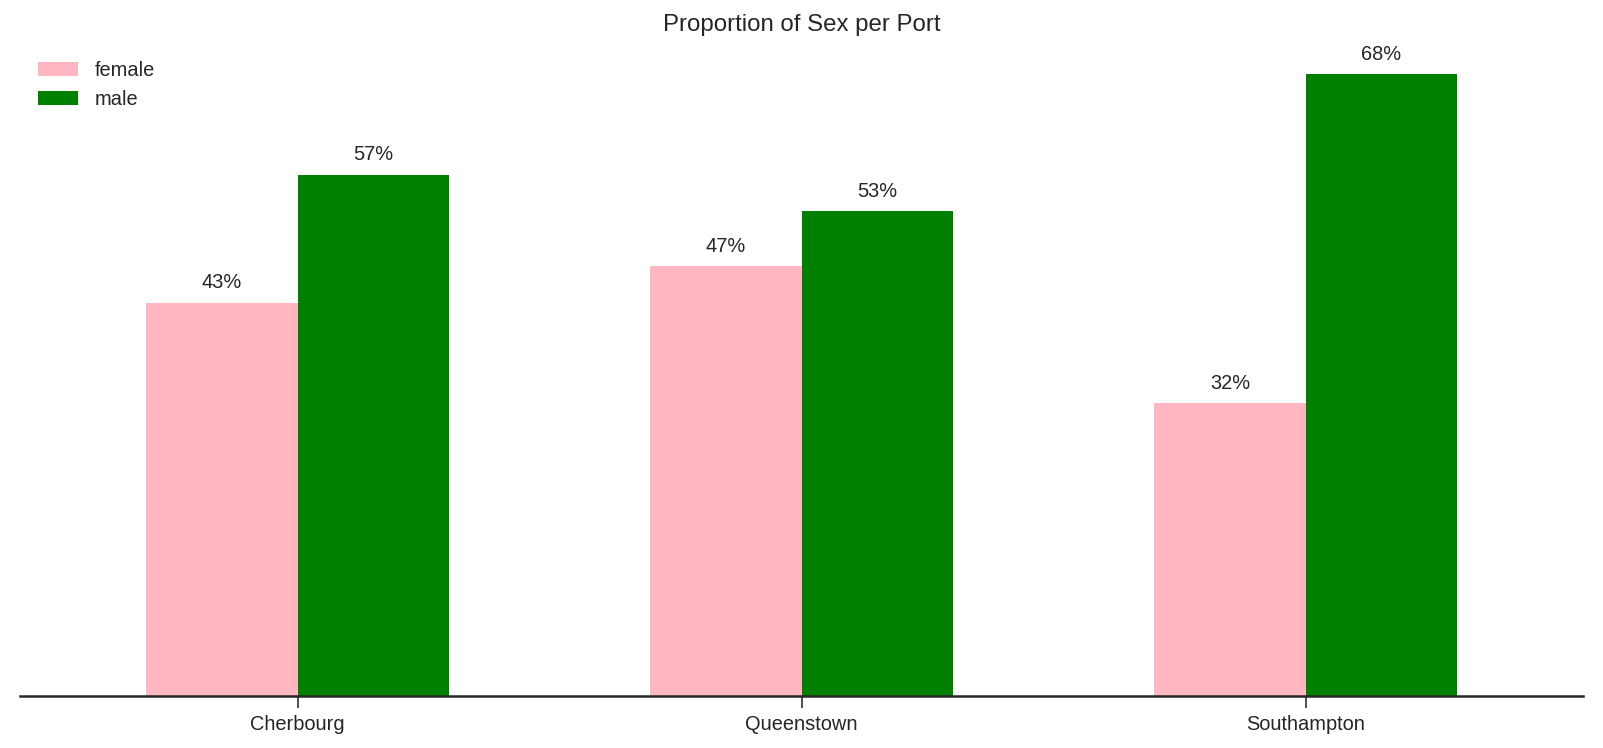

In [87]:
Groupby_TwoCol_Plot(descript,'Embarked','Sex', color_palette=('lightpink','green'), 
                    plt_style = 'seaborn-ticks', custom_title= 'Proportion of Sex per Port', legloc = 'upper left')

Total No. of Sex 891


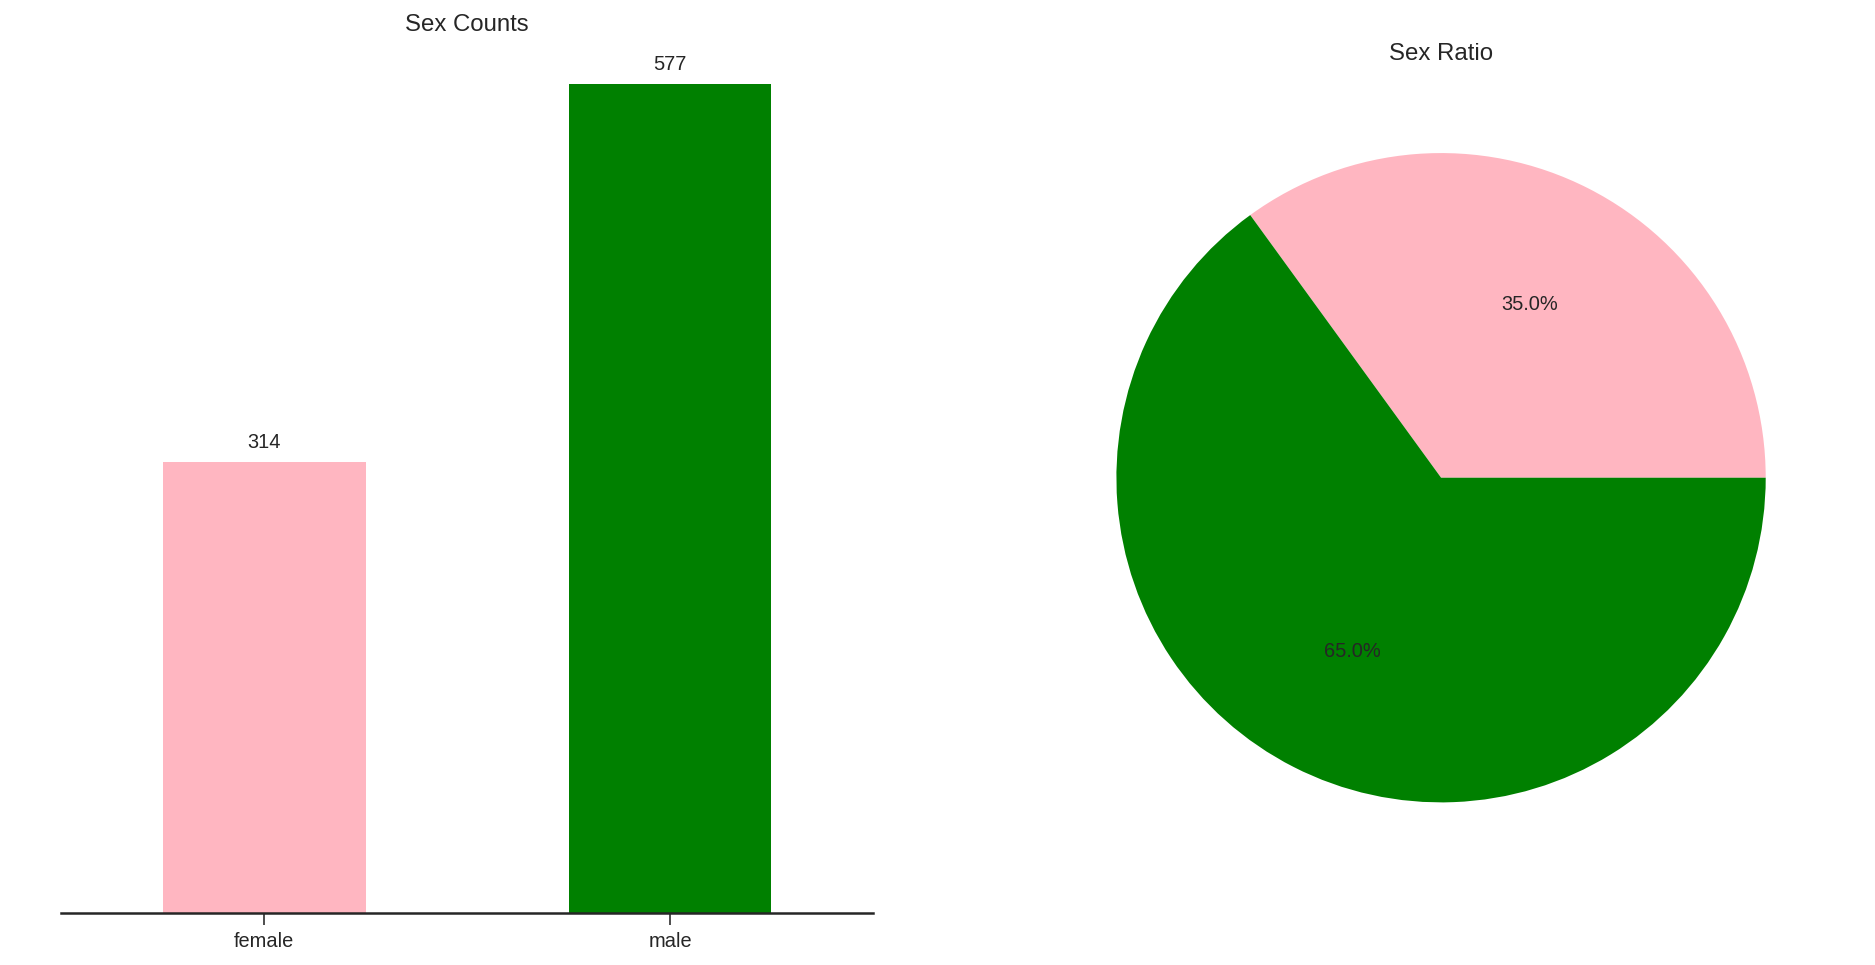

In [88]:
Groupby_OneCol_comp_plot(descript,'Sex',color_palette=('lightpink','green'))

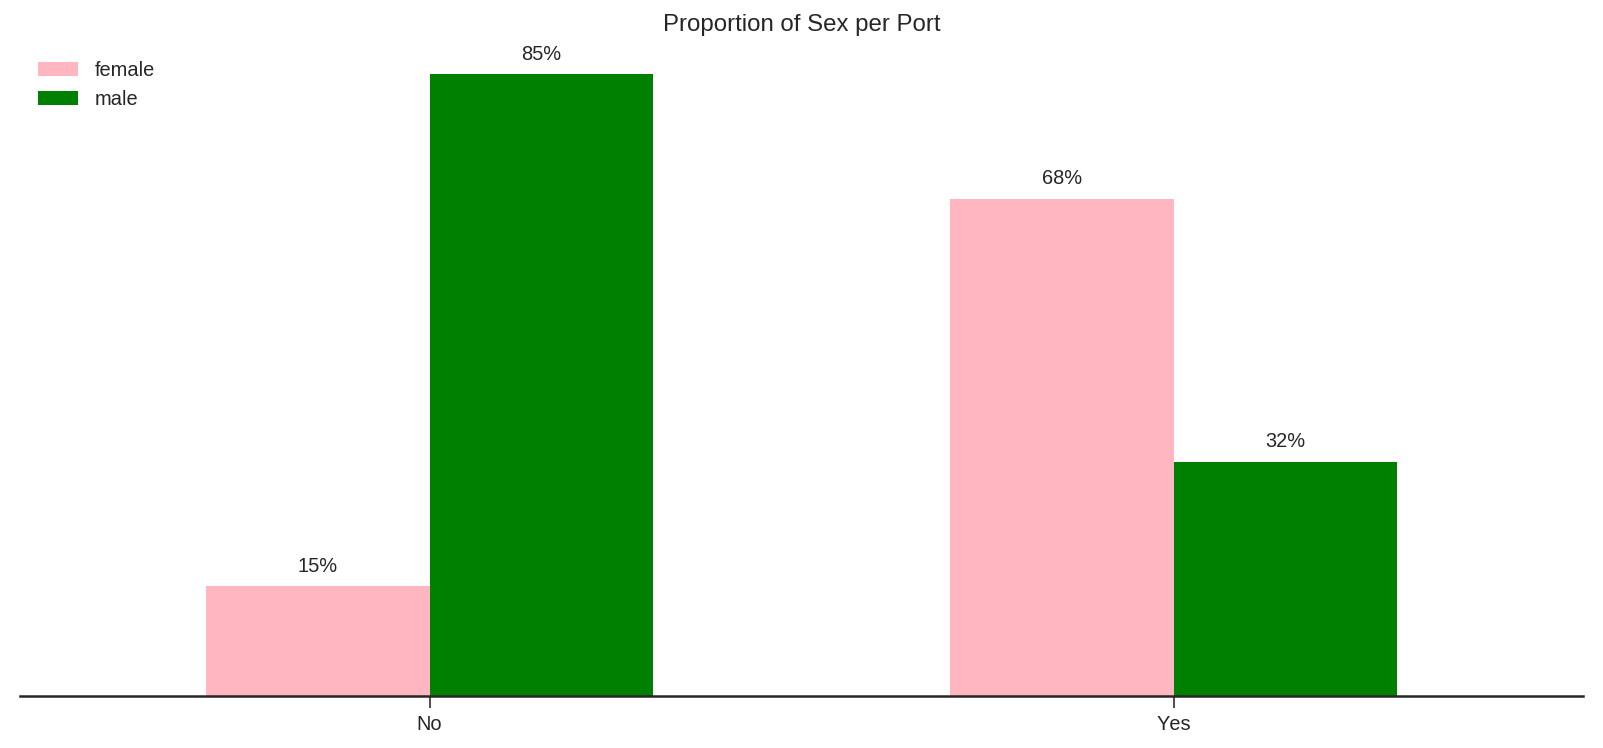

In [89]:
Groupby_TwoCol_Plot(descript,'Survived','Sex', color_palette=('lightpink','green'), 
                    plt_style = 'seaborn-ticks', custom_title= 'Proportion of Sex per Port', legloc = 'upper left')

Text(0, 0.5, 'proportion of survival')

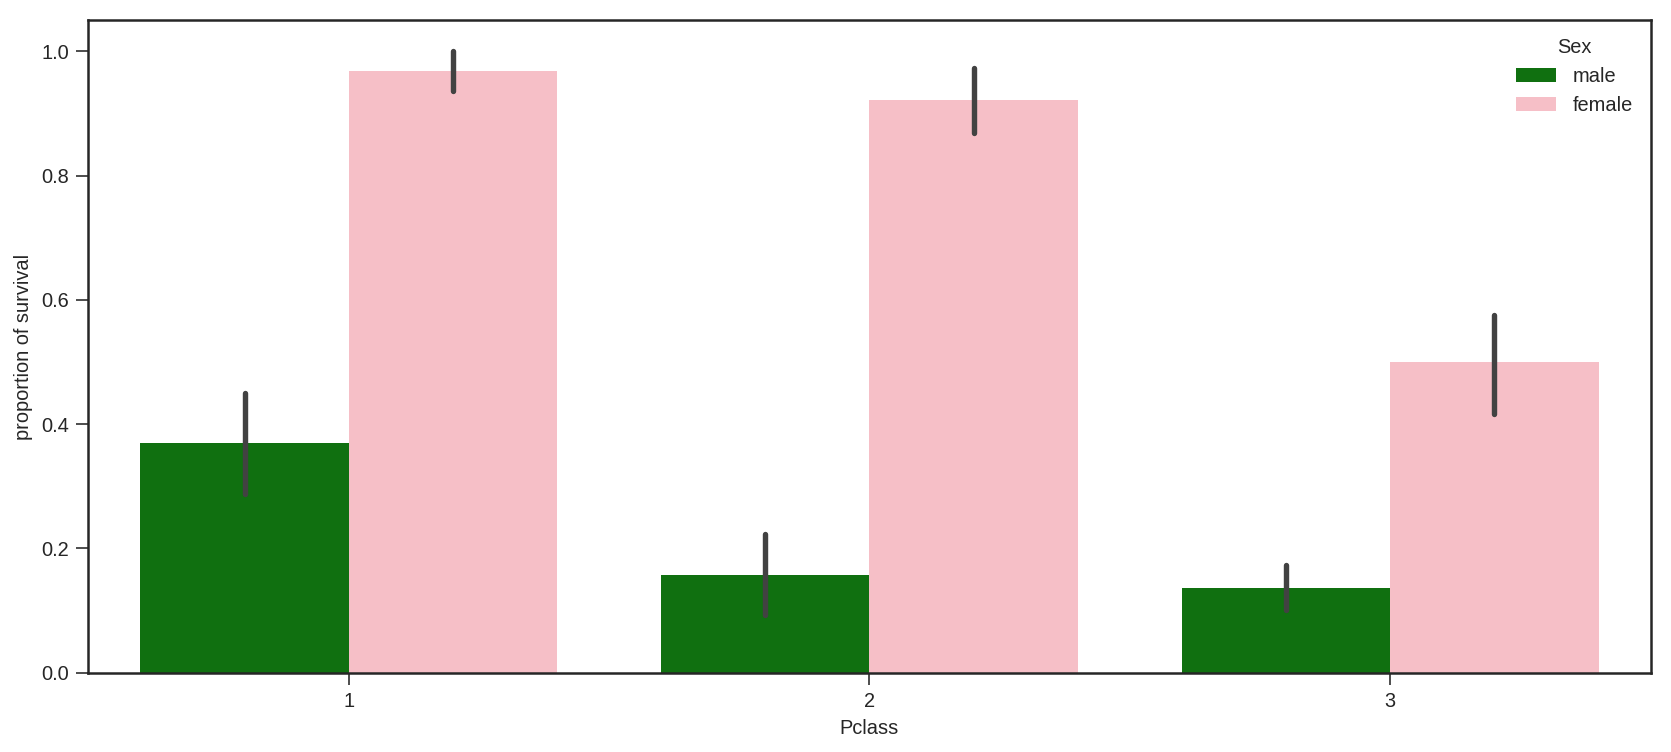

In [91]:
plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('green','lightpink')))
sns.barplot(data=n_titanic_data, x='Pclass', hue='Sex', y='Survived',estimator=np.mean);
plt.ylabel('proportion of survival')


In [98]:
n_titanic_data[(n_titanic_data['Age'].notnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S


In [99]:
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())]
not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

/home/karan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


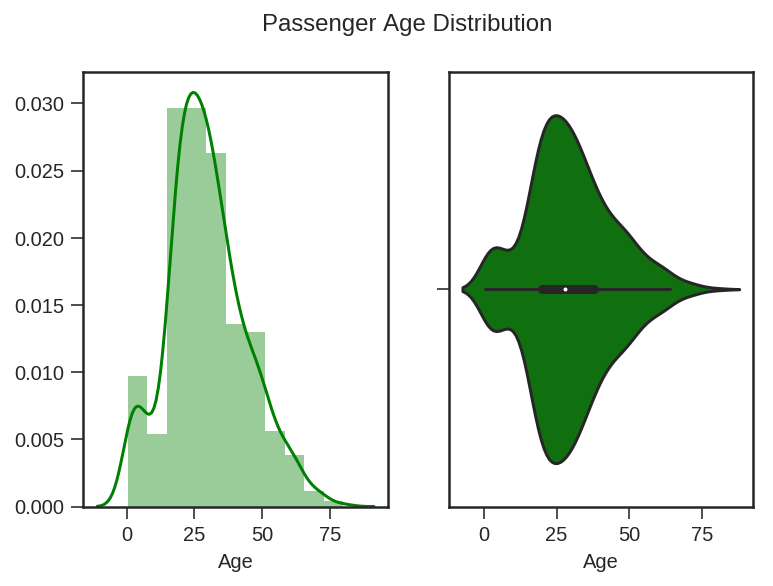

In [102]:
ax = plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [103]:
v = pd.DataFrame(not_missing['Age'].describe())
v.index = ['Population Size','Mean','Std. Dev','Min','25%qt','Median','75%qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Dev,14.526
Min,0.420
25%qt,20.125
Median,28.000
75%qt,38.000
Max,80.000


/home/karan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/karan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


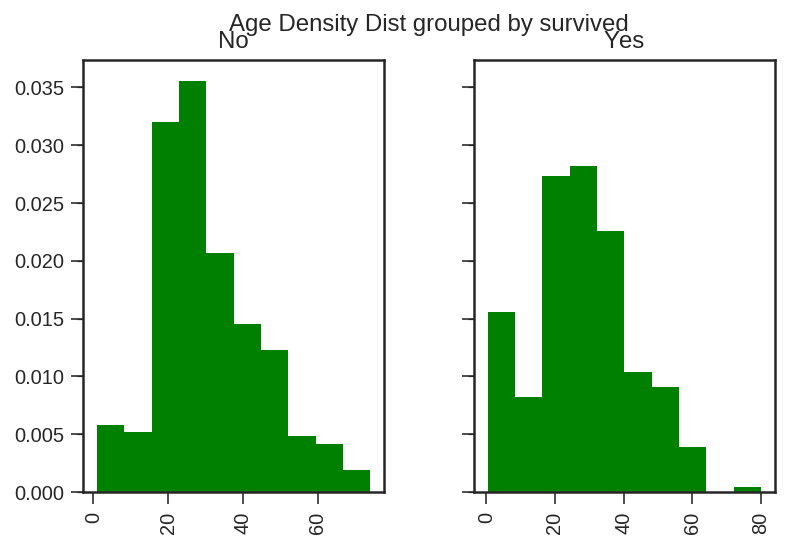

In [105]:
not_missing.hist(column='Age',by='Survived',sharey=True,normed=True)
plt.suptitle('Age Density Dist grouped by survived');

In [ ]:
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived'] == 'No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived'] == 'Yes']

In [126]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10), right=True, labels=age_labels)

In [130]:
#not_missing.loc[:,'age-groups'] = age_group_values
not_missing[not_missing['age-groups'] != age_group_values]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,age-groups


In [129]:
not_missing.loc[not_missing['Age']>=80,['age-groups','Age']]

,age-groups,Age
630,70-80,80.0


In [137]:
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,26,71,146,86,53,25,13,4
Yes,38,44,84,69,33,17,4,1


In [140]:
chi2, p, dof, expected = chi2_contingency(obs_table)
print("chi2: {}\ndof:{}\np:{}".format(chi2,dof,p))

chi2: 15.296687749545693
dof:7
p:0.03237887956708356
